DATA LOADING

In [22]:
import pandas as pd

In [24]:
df = pd.read_csv("C:\\Users\\sivas\\OneDrive\\Desktop\\Coursera\\IBM\\Machine learning\\teleCust1000t.csv")
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


DATA EXPLORATION

In [25]:
df.custcat.value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

281-plus service,266-basic service,236-total service,217-e service customers

array([[<Axes: title={'center': 'income'}>]], dtype=object)

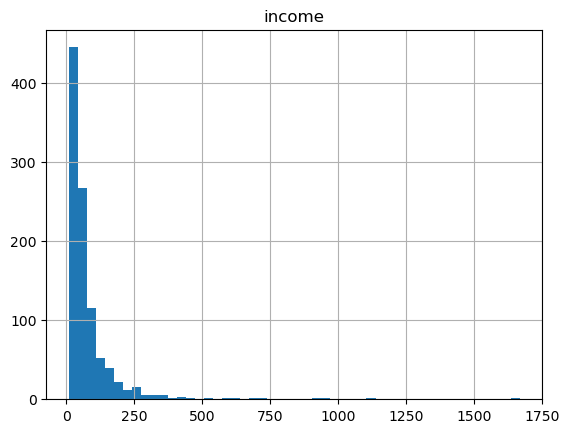

In [27]:
df.hist(column='income',bins=50)

In [28]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [29]:
x=df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']].values
x[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [30]:
y=df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

# NORMALIZE THE DATA

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
x=StandardScaler().fit(x).transform(x.astype(float))
x[0:5]
x.shape

(1000, 11)

# TRAIN-TEST SPLIT

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=4,test_size=0.2)

In [35]:
X_train.shape

(800, 11)

In [36]:
X_test.shape

(200, 11)

# KNN CLASSIFICATION

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
k=4
model=KNeighborsClassifier(n_neighbors=k)

In [39]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [40]:
model.score(X_test,y_test)

0.32

In [41]:
yhat=model.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

# EVALUATION

In [42]:
from sklearn import metrics

In [43]:
metrics.accuracy_score(y_test,yhat)

0.32

In [44]:
metrics.accuracy_score(y_train,model.predict(X_train))

0.5475

In [100]:
k=6

In [102]:
model=KNeighborsClassifier(n_neighbors=k)

In [104]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [106]:
yhat=model.predict(X_test)
yhat[0:5]

array([3, 3, 3, 4, 4], dtype=int64)

In [108]:
metrics.accuracy_score(y_test,yhat)

0.31

In [110]:
metrics.accuracy_score(y_train,model.predict(X_train))

0.51625

In [112]:
import numpy as np
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
mean_acc

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [114]:
l=[1,2,3,4,5,6,7,8,9,10]
p=[]
for i in l:
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    yhattt=model.predict(X_test)
    g=metrics.accuracy_score(y_test,yhattt)
    p.append(g)

In [116]:
p

[0.3, 0.29, 0.315, 0.32, 0.315, 0.31, 0.335, 0.325, 0.34, 0.33]

# Visualization

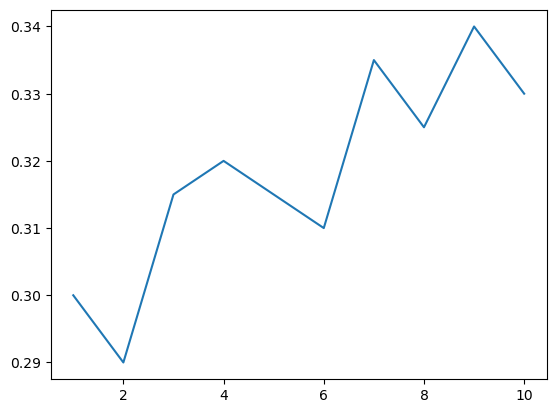

In [56]:
import matplotlib.pyplot as plt
plt.plot(l,p)

In [128]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
print(mean_acc)
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

[0. 0. 0. 0. 0. 0. 0. 0. 0.]


array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

In [130]:
std_acc

array([0.0324037 , 0.03208582, 0.03284623, 0.03298485, 0.03284623,
       0.03270321, 0.03337477, 0.0331191 , 0.03349627])

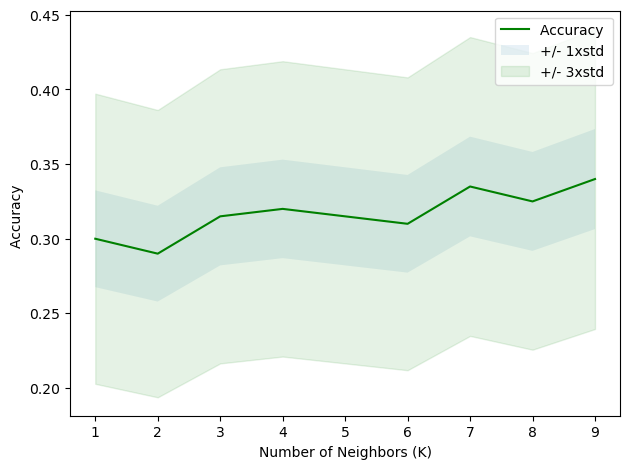

In [132]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [135]:
mean_acc.max()

0.34

In [139]:
mean_acc.argmax()+1

9